In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
county_df = pd.read_excel("data/County_Statistics.xlsx")
county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   County                           57 non-null     object 
 1   Emergency Visits / 100000        42 non-null     float64
 2   Hospitalizations / 100000        19 non-null     float64
 3   Energy Burden % of Income        57 non-null     object 
 4   Imperviousness                   57 non-null     object 
 5   Park within 1/2 Mile             57 non-null     object 
 6   Hospital Beds / 10000            57 non-null     object 
 7   Housing Built before 1980        57 non-null     object 
 8   Housing Insecurity               57 non-null     object 
 9   Lack of Reliable Transportation  57 non-null     object 
 10  % w/o Internet                   57 non-null     object 
 11  Utility Services Threat          57 non-null     object 
dtypes: float64(2), object(10

Missing values in Emergency visits and Hospitalizations. Let's drop hospitalizations since there are so many missing values. There is much more data on emergency visits so let's keep as much as we can and only drop county data that have empty values for it. We could also add heat related illnesses from tracking california tool if available.

#### Cleaning

In [ ]:
#keep only emergency visits and columns 4&5
keep = ['Emergency Visits / 100000', 'Park within 1/2 Mile', 'Imperviousness']

county_df = county_df[keep]

#drop na to drop rows with empty values for emergency visits
#this will turn our target into emergency visits for now

county_df = county_df.dropna()

county_df.head()


,Emergency Visits / 100000,Park within 1/2 Mile,Imperviousness
2,43.53,62.6%,2.0%
5,13.06,80.6%,15.1%
7,17.31,71.8%,1.3%
8,28.84,69.6%,2.5%
9,47.49,37.8%,1.0%


Need to convert park within 1/2 mile & imperviousness into floats from % objects

In [13]:
#remove % before converting to float
#county_df['Park within 1/2 Mile'] = county_df['Park within 1/2 Mile'].str.removesuffix('%')
#county_df['Imperviousness'] = county_df['Imperviousness'].str.removesuffix('%')

#county_df['Park within 1/2 Mile'] = county_df['Park within 1/2 Mile'].astype(float)
#county_df['Imperviousness'] = county_df['Imperviousness'].astype(float)

county_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 2 to 56
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Emergency Visits / 100000  42 non-null     float64
 1   Park within 1/2 Mile       42 non-null     float64
 2   Imperviousness             42 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


In [6]:
county_df.describe()

,Emergency Visits / 100000,Park within 1/2 Mile,Imperviousness
count,42.000000,42.000000,42.000000
mean,23.615476,68.052381,6.226190
std,19.532277,17.283056,10.971561
min,2.890000,30.900000,0.400000
25%,10.197500,56.625000,1.325000
50%,20.850000,68.400000,2.500000
75%,30.185000,81.725000,4.800000
max,115.940000,100.000000,62.300000


#### Test-train split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
county_train, county_test = train_test_split(
    county_df, test_size=0.2, random_state=216, shuffle=True
)

##### Exploratory Data Analysis

In [9]:
county_train.columns

Index(['Emergency Visits / 100000', 'Park within 1/2 Mile', 'Imperviousness'], dtype='object')

In [11]:
features = county_train.columns[1:]

print(features)

Index(['Park within 1/2 Mile', 'Imperviousness'], dtype='object')


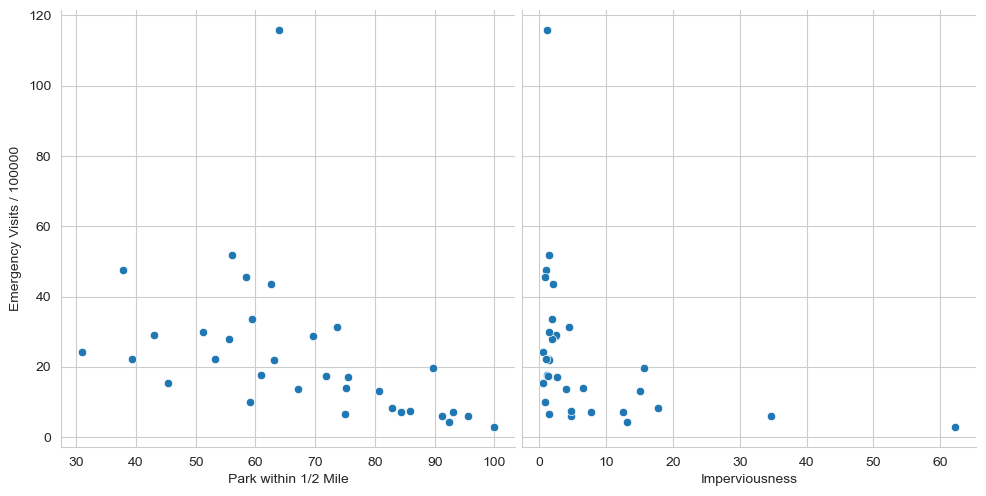

In [12]:
sns.pairplot(
    county_train,
    y_vars=["Emergency Visits / 100000"],
    x_vars=features,
    height=5,
    diag_kind=None,
)

plt.show()

There is a clear relationship between park within 1/2 mile and emergency visits.
However, while the relationship between imperviousness is clear and almost exponential (negative). Meaning highly urbanized (high imperviousness) counties have much less emergency visits. It would be interesting to see how much of this imperviousness is trees versus buildings.

In [18]:
county_df[features].corrwith(county_df['Emergency Visits / 100000'])


Park within 1/2 Mile   -0.444207
Imperviousness         -0.338620
dtype: float64